##**Data Collection**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bank-marketing-dataset.xlsx to bank-marketing-dataset.xlsx


In [2]:
#renaming the key
uploaded['bank-marketing.xlsx'] = uploaded.pop(list(uploaded.keys())[0])

In [3]:
import pandas as pd
import io

df=pd.read_excel(io.BytesIO(uploaded['bank-marketing.xlsx']))
#csv_filename = "bank-marketing.csv"
#df.to_csv(csv_filename, index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    34166 non-null  object
 9   day        45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   8693 non-null   object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,telephone,"5,may",261,1,-1,0,success,no
1,44,technician,single,secondary,no,29,yes,no,telephone,"5,may",151,1,-1,0,success,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,telephone,"5,may",76,1,-1,0,success,no
3,47,blue-collar,married,NaN,no,1506,yes,no,telephone,"5,may",92,1,-1,0,success,no
4,33,NaN,single,NaN,no,1,no,no,NaN,"5,may",198,1,-1,0,NaN,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [7]:
print("Number of rows : ", len(df))

Number of rows :  45211


In [8]:
df.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,11045
day,0


##**Data Preprocessing**

In [9]:
#dealing with all the null values
df.fillna(method='ffill',inplace=True)
#as all the columns with null values have object data type, front fill method is used to fill the null values

/tmp/ipython-input-2571477127.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [10]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [12]:
df.describe() # all statistical info of dataset

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
numeric_cols = df.select_dtypes(include='number').columns #finds all the numeric columns
df[numeric_cols]

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825,977,3,-1,0
45207,71,1729,456,2,-1,0
45208,72,5715,1127,5,184,3
45209,57,668,508,4,-1,0


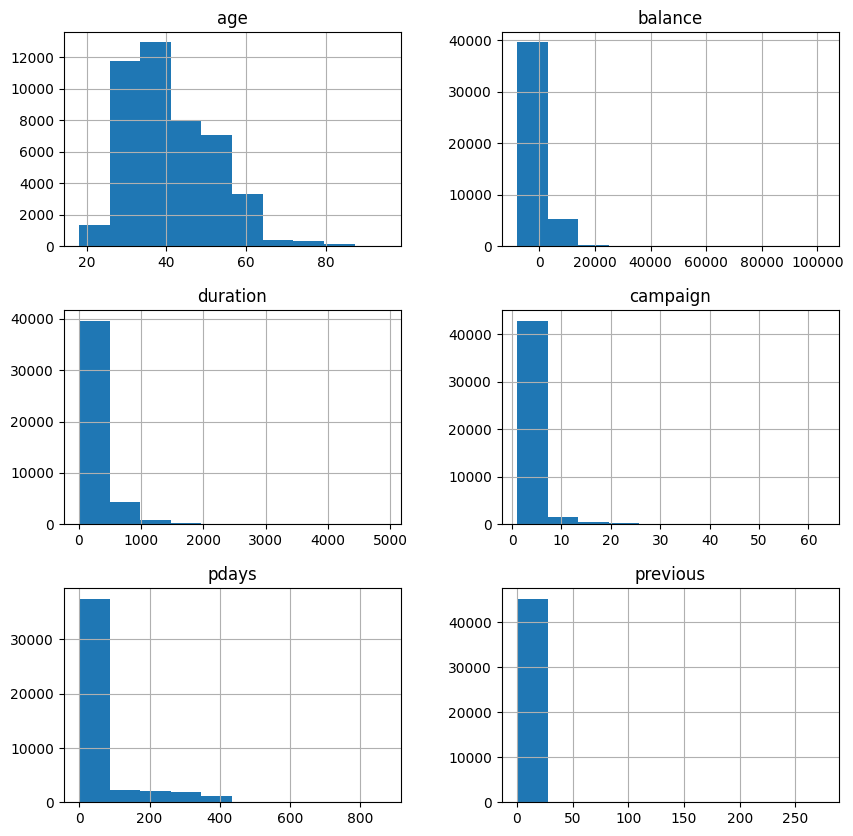

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df[numeric_cols].hist(figsize=(10,10))
plt.show()

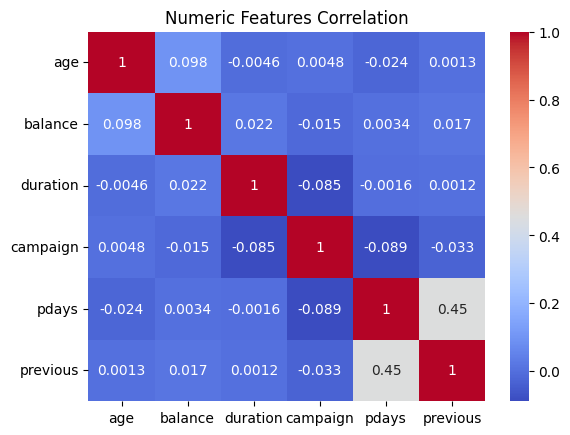

In [21]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Features Correlation")
plt.show()

In [28]:
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [30]:
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married  secondary      no     1506     yes   no   
4       33   blue-collar    single  secondary      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact     day  duration  campaign  pdays

In [31]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


In [38]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = cat_cols[:-1]
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'poutcome']


In [39]:
#One-Hot Encoding
X = pd.get_dummies(X, columns=cat_cols)
print("Final Features", X.columns)

Final Features Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       ...
       'day_9,jul', 'day_9,jun', 'day_9,mar', 'day_9,may', 'day_9,nov',
       'day_9,oct', 'day_9,sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object', length=352)


In [40]:
y = pd.get_dummies(y, prefix='binary', drop_first=True)
print(y)

       binary_yes
0           False
1           False
2           False
3           False
4           False
...           ...
45206        True
45207        True
45208        True
45209       False
45210       False

[45211 rows x 1 columns]


##**Normalization**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

##**Model Training**

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

##**Model Evaluation**

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_gnb = gnb.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy Score", accuracy_gnb)

Accuracy Score 0.879243613844963


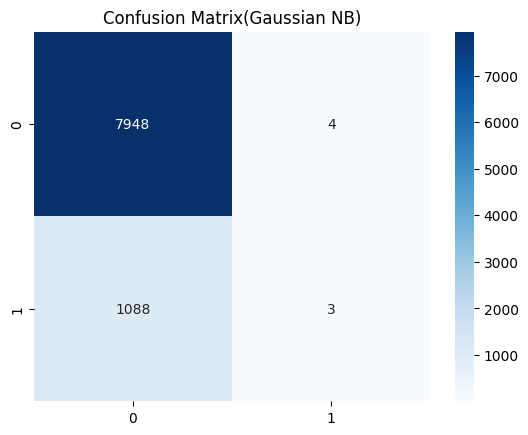

In [61]:
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix(Gaussian NB)')
plt.show()